In [1]:
import matplotlib.pyplot as plt
import neatplot
import seaborn as sns
import pandas
import pickle
import numpy as np
import pandas as pd
from pathlib import Path

neatplot.set_style("fonts")

In [2]:
path = Path("./")
data = []
for p in path.rglob("*"):
    if not p.stem.startswith("seed"):
        continue
    exp_dir = p
#     with open(exp_dir / "settings.pkl", "rb") as f:
#         settings = pickle.load(f)
#     print(settings)
    dir_list = str(exp_dir).split('/')
    acq_func = dir_list[0]
    seed = int(dir_list[1].split('_')[1])
#     print(acq_func)
#     print(seed)
#     input('paused')
    true_costs = np.load(exp_dir / "true_costs.npy")
    areas = np.load(exp_dir / "areas.npy")
    for iteration, samples in enumerate(zip(true_costs, areas)):
        for true_cost, area in zip(*samples):
#             data.append((settings["acq_func"], settings["seed"], iteration, true_cost, area))
            data.append((acq_func, seed, iteration, true_cost, area))

In [3]:
labels = ("acqfunc", "seed", "iteration", "truecost", "area")
df = pd.DataFrame(data, columns=labels)

In [4]:
df["weightedscore"] = (df["truecost"] - 1.052726718440365) * df["area"]

In [5]:
df_averaged_over_samples = df.groupby(["acqfunc", "seed", "iteration"]).mean().reset_index()

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
# sns.set_palette("colorblind")
sns.set_palette("tab10")

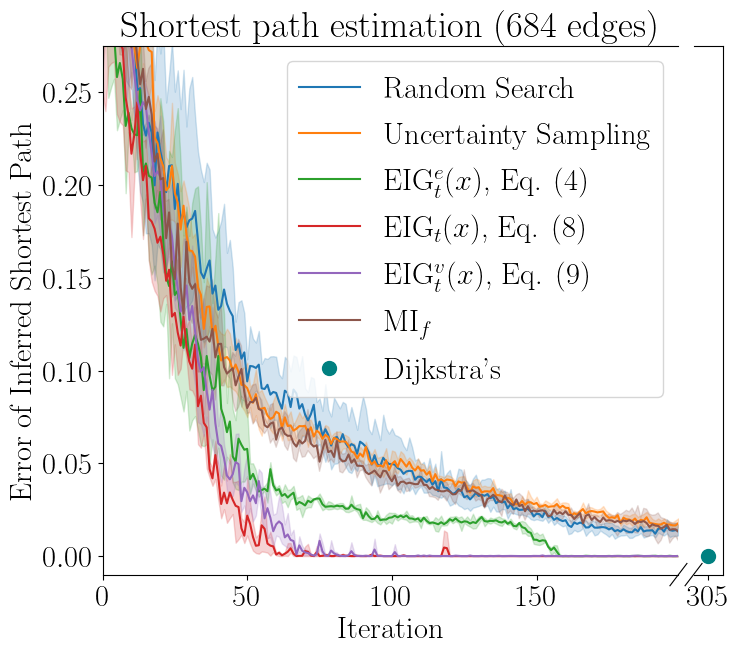

In [7]:
from brokenaxes import brokenaxes
baxes = brokenaxes(xlims=((0,199),(300, 310)), wspace=.05)
fig = baxes.fig
ax, ax2 = baxes.axs

fig.set_figwidth(8)
fig.set_figheight(7)


dij_n_steps = 305


# Plot lineplot
sns.lineplot(data=df_averaged_over_samples, x="iteration", y="area", ax=ax, hue="acqfunc")

# Plot Dijkstra dot
# ax2.plot([dij_n_steps], [0.0], 'o', color="#d62728", markersize=10, label="Dijkstras") # red
# ax2.plot([dij_n_steps], [0.0], 'o', color="#8c564b", markersize=10, label="Dijkstras") # brown
# ax2.plot([dij_n_steps], [0.0], 'o', color="#17becf", markersize=10, label="Dijkstras") # cyan
ax2.plot([dij_n_steps], [0.0], 'o', color="teal", markersize=10, label="Dijkstras") # teal

# ax2.axvline(dij_n_steps, color="#d62728", linestyle="--", label="Dijkstras")


# Set axes labels
ax.set(xlabel="Iteration",
       ylabel="Error of Inferred Shortest Path")
# ax.set(xlabel="Number of Queries",
#        ylabel="Area between sampled path and ground truth")


# Y axis
ax.set_ylim((-0.01, 0.275))
ax2.set_ylim((-0.01, 0.275))
# ax.set_yscale('log')

# Ticks
start, end = ax.get_xlim()
stepsize = 50
ax.xaxis.set_ticks(np.arange(start, end, stepsize))

start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(dij_n_steps, end, stepsize))

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, end, 0.05))

# Legend
handles, labels = ax.get_legend_handles_labels()

handles = handles + [ax2.lines[1]]

# handles = [handles[3], handles[4], handles[1], handles[2], handles[0], handles[5]]
# labels =["Random Search", "Uncertainty Sampling", "EIG$^e_t(x)$, Eq. (4)", "EIG$_t(x)$, Eq. (8)", "EIG$^v_t(x)$, Eq. (9)", "Dijkstra's"]

handles = [handles[0], handles[1], handles[2], handles[3], handles[4], handles[5], handles[6]]
labels =["Random Search", "Uncertainty Sampling", "EIG$^e_t(x)$, Eq. (4)", "EIG$_t(x)$, Eq. (8)", "EIG$^v_t(x)$, Eq. (9)", "MI$_{f}$", "Dijkstra's"]

legend = ax.legend(handles, labels)
# ax.get_legend().remove()

# Add box around axes
ax.set_frame_on(True)
ax2.set_frame_on(True)

ax.spines['top'].set_visible(True)
ax2.spines['top'].set_visible(True)
# ax.spines['right'].set_visible(True)
ax2.spines['right'].set_visible(True)

# ax.set_title(r'$10 \times 10$ Grid with 684 Edges')
ax.set_title('Shortest path estimation (684 edges)')

ax.grid(False)
ax2.grid(False)

ax.spines['bottom'].set_color('#000000')
ax.spines['top'].set_color('#000000') 
ax.spines['right'].set_color('#000000')
ax.spines['left'].set_color('#000000')
ax2.spines['bottom'].set_color('#000000')
ax2.spines['top'].set_color('#000000') 
ax2.spines['right'].set_color('#000000')
ax2.spines['left'].set_color('#000000')

# Save
fig.savefig("area.pdf", bbox_inches = 'tight')
fig.savefig("area.png", bbox_inches = 'tight')